## 1.  Load


### 1.1. Dataset information

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("customer_signups.csv")

#Dataset structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       298 non-null    object
 1   name              291 non-null    object
 2   email             266 non-null    object
 3   signup_date       298 non-null    object
 4   source            291 non-null    object
 5   region            270 non-null    object
 6   plan_selected     292 non-null    object
 7   marketing_opt_in  290 non-null    object
 8   age               288 non-null    object
 9   gender            292 non-null    object
dtypes: object(10)
memory usage: 23.6+ KB


In [2]:
# Column names
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['customer_id', 'name', 'email', 'signup_date', 'source', 'region', 'plan_selected', 'marketing_opt_in', 'age', 'gender']


In [3]:
#First 5 rows
print("\nFirst 5 rows:")
display(df.head())
# Display all columns in the dataframe
pd.set_option('display.max_columns', None)


First 5 rows:


,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,02-01-24,LinkedIn,West,basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,03-01-24,Google,North,PREMIUM,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,04-01-24,YouTube,NaN,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,05-01-24,LinkedIn,West,Premium,No,25,Other


### 1.2. Identify Missing Values

In [4]:
#Missing values summary
print("\nMissing values per column:")
missing_summary = pd.DataFrame({
    "Missing Count": df.isnull().sum(),
    "Missing Percentage": (df.isnull().mean() * 100).round(2)
})
display(missing_summary)


Missing values per column:


,Missing Count,Missing Percentage
customer_id,2,0.67
name,9,3.00
email,34,11.33
signup_date,2,0.67
source,9,3.00
region,30,10.00
plan_selected,8,2.67
marketing_opt_in,10,3.33
age,12,4.00
gender,8,2.67


In [5]:
#Data types of each column
print("\nData types of each column:")
display(df.dtypes)


Data types of each column:


customer_id         object
name                object
email               object
signup_date         object
source              object
region              object
plan_selected       object
marketing_opt_in    object
age                 object
gender              object
dtype: object

## 2. Data Cleaning and Transformation


### 2.1 Convert `signup_date` to Datetime

In [6]:
# Convert 'signup_date' to datetime format
df['signup_date'] = pd.to_datetime(df['signup_date'], format='%d-%m-%y', errors='coerce')

# Show cleaned signup_date column
print("Converted column: 'signup_date' (first 5 values):")
display(df[['signup_date']].head(5))

# Show data type
print("\nData type of 'signup_date':", df['signup_date'].dtype)



Converted column: 'signup_date' (first 5 values):


,signup_date
0,NaT
1,2024-01-02
2,2024-01-03
3,2024-01-04
4,2024-01-05



Data type of 'signup_date': datetime64[ns]


### 2.2 Convert `age` to numeric

In [7]:
# Convert 'age' to numeric (force invalid entries to NaN)
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Invalidate unrealistic age values (<18 or >100)
df.loc[(df['age'] < 18) | (df['age'] > 100), 'age'] = pd.NA

# Show cleaned age column
print("Converted column: 'age' (first 5 values):")
display(df[['age']].head(5))

# Show data type
print("\nData type of 'age':", df['age'].dtype)

# Show count of missing/invalid values
invalid_age_count = df['age'].isna().sum()
print(f"\nNumber of missing or invalid ages after cleaning: {invalid_age_count}")


Converted column: 'age' (first 5 values):


,age
0,34.0
1,29.0
2,34.0
3,40.0
4,25.0



Data type of 'age': float64

Number of missing or invalid ages after cleaning: 20


### 2.2 Standardise Inconsistent Text Values

In [8]:
# Standardize 'name'
changed_name = (df['name'] != df['name'].str.strip().str.title()).sum()
df['name'] = df['name'].str.strip().str.title()
print(f"Standardised {changed_name} values in 'name'")

Standardised 17 values in 'name'


In [9]:
# Standardize 'email'
changed_email = (df['email'] != df['email'].str.strip().str.lower()).sum()
df['email'] = df['email'].str.strip().str.lower()
print(f"Standardised {changed_email} values in 'email'")

Standardised 34 values in 'email'


In [10]:
#Standardize 'plan_selected'
changed_plan = (df['plan_selected'] != df['plan_selected'].str.strip().str.title()).sum()
df['plan_selected'] = df['plan_selected'].str.strip().str.title()
df['plan_selected'] = df['plan_selected'].replace({'Unknownplan': pd.NA})
print(f"Standardised {changed_plan} values in 'plan_selected'")

Standardised 144 values in 'plan_selected'


In [11]:
#Standardize 'gender'
changed_gender = (df['gender'] != df['gender'].str.strip().str.title()).sum()
df['gender'] = df['gender'].str.strip().str.title()
df['gender'] = df['gender'].replace({'123': pd.NA})
print(f"Standardised {changed_gender} values in 'gender'")

Standardised 108 values in 'gender'


In [12]:
#Standardize 'marketing_opt_in'
changed_marketing = (df['marketing_opt_in'] != df['marketing_opt_in'].str.strip().str.title()).sum()
df['marketing_opt_in'] = df['marketing_opt_in'].str.strip().str.title()
print(f"Standardised {changed_marketing} values in 'marketing_opt_in'")

Standardised 10 values in 'marketing_opt_in'


In [13]:
#Standardize 'source'
changed_source = (df['source'] != df['source'].str.strip().str.title()).sum()
df['source'] = df['source'].str.strip().str.title()
print(f"Standardised {changed_source} values in 'source'")

Standardised 106 values in 'source'


In [14]:
#Standardize 'region'
changed_region = (df['region'] != df['region'].str.strip().str.title()).sum()
df['region'] = df['region'].str.strip().str.title()
print(f"Standardised {changed_region} values in 'region'")

Standardised 30 values in 'region'


### 2.3 Remove duplicate rows based on customer_id 

In [15]:
# Normalize 'customer_id' (preserving NaNs)
df['customer_id'] = df['customer_id'].astype('string').str.strip().str.upper()

# Count duplicates with actual values (excluding NaN)
duplicates_real = df['customer_id'].duplicated(keep=False) & df['customer_id'].notna()
print(f"Duplicate 'customer_id' values (non-NaN): {duplicates_real.sum()}")

# Count entries with NaN in 'customer_id'
duplicates_nan = df['customer_id'].isna().sum()
print(f"'customer_id' values that are NaN: {duplicates_nan}")

# Remove duplicate rows (keep the first occurrence)
df = df.drop_duplicates(subset='customer_id', keep='first')
print(f"Remaining rows after removing duplicates: {df.shape[0]}")


Duplicate 'customer_id' values (non-NaN): 0
'customer_id' values that are NaN: 2
Remaining rows after removing duplicates: 299


### 2.4 Handle missing values 

In [16]:
# Drop rows with missing 'email' (essential for contact/identity)
missing_email = df['email'].isna().sum()
df = df.dropna(subset=['email'])
print(f"Dropped {missing_email} rows with missing 'email'.")

Dropped 34 rows with missing 'email'.


In [17]:
#Drop rows with missing 'customer_id' (should be unique per user)
missing_id = df['customer_id'].isna().sum()
df = df.dropna(subset=['customer_id'])
print(f"Dropped {missing_id} rows with missing 'customer_id'.")

Dropped 1 rows with missing 'customer_id'.


In [18]:
# Fill missing 'name' with 'Unknown'
missing_name = df['name'].isna().sum()
df['name'] = df['name'].fillna('Unknown')
print(f"Filled {missing_name} missing values in 'name' with 'Unknown'.")

Filled 7 missing values in 'name' with 'Unknown'.


In [19]:
#Fill missing 'region' with 'Unknown'
missing_region = df['region'].isna().sum()
df['region'] = df['region'].fillna('Unknown')
print(f"Filled {missing_region} missing values in 'region' with 'Unknown'.")

Filled 26 missing values in 'region' with 'Unknown'.


In [20]:
#Fill missing or invalid 'age' values with the median
missing_age = df['age'].isna().sum()
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)
print(f"Filled {missing_age} missing or invalid values in 'age' with median ({median_age}).")

Filled 18 missing or invalid values in 'age' with median (34.0).


In [21]:
# Calculate median date ignoring missing
median_date = df['signup_date'].median()

# Fill missing signup_date with median
missing_signup = df['signup_date'].isna().sum()
df['signup_date'] = df['signup_date'].fillna(median_date)

print(f"Filled {missing_signup} missing values in 'signup_date' with median date: {median_date}")

Filled 6 missing values in 'signup_date' with median date: 2024-05-28 12:00:00


In [22]:
#Fill missing 'gender' with 'Unspecified'
missing_gender = df['gender'].isna().sum()
df['gender'] = df['gender'].fillna('Unspecified')
print(f"Filled {missing_gender} missing values in 'gender' with 'Unspecified'.")

Filled 11 missing values in 'gender' with 'Unspecified'.


In [23]:
#Fill missing 'plan_selected' with 'Unknown'
missing_plan = df['plan_selected'].isna().sum()
df['plan_selected'] = df['plan_selected'].fillna('Unknown')
print(f"Filled {missing_plan} missing values in 'plan_selected' with 'Unknown'.")

Filled 12 missing values in 'plan_selected' with 'Unknown'.


In [24]:
#Fill missing 'source' with 'Unknown'
missing_source = df['source'].isna().sum()
df['source'] = df['source'].fillna('Unknown')
print(f"Filled {missing_source} missing values in 'source' with 'Unknown'.")

Filled 9 missing values in 'source' with 'Unknown'.


In [25]:
#Fill missing 'marketing_opt_in' with 'No'
missing_opt_in = df['marketing_opt_in'].isna().sum()
df['marketing_opt_in'] = df['marketing_opt_in'].fillna('No')
print(f"Filled {missing_opt_in} missing values in 'marketing_opt_in' with 'No'.")

Filled 9 missing values in 'marketing_opt_in' with 'No'.


## 3. Summary Outputs


### 3.1 Sign-ups per week  

In [26]:
# Group by week and count sign-ups
weekly_signups = df.groupby(pd.Grouper(key='signup_date', freq='W')).size()

# Convert to DataFrame for clear display
weekly_signups_df = weekly_signups.reset_index()
weekly_signups_df.columns = ['Week', 'Sign-ups']

# Display the full table
print("Weekly Sign-ups Summary:")
display(weekly_signups_df)


Weekly Sign-ups Summary:


,Week,Sign-ups
0,2024-01-07,6
1,2024-01-14,6
2,2024-01-21,6
3,2024-01-28,6
4,2024-02-04,7
5,2024-02-11,6
6,2024-02-18,6
7,2024-02-25,6
8,2024-03-03,7
9,2024-03-10,6


### 3.2 Sign-ups by source, region, and plan_selected

In [27]:
#Sign-ups by source
signup_by_source = df['source'].value_counts().reset_index()
signup_by_source.columns = ['Source', 'Sign-ups']

print("Sign-ups by Source:")
display(signup_by_source)

#Sign-ups by region
signup_by_region = df['region'].value_counts().reset_index()
signup_by_region.columns = ['Region', 'Sign-ups']

print("\nSign-ups by Region:")
display(signup_by_region)

#Sign-ups by plan_selected
signup_by_plan = df['plan_selected'].value_counts().reset_index()
signup_by_plan.columns = ['Plan Selected', 'Sign-ups']

print("\nSign-ups by Plan Selected:")
display(signup_by_plan)



Sign-ups by Source:


,Source,Sign-ups
0,Youtube,53
1,Referral,44
2,Google,43
3,Instagram,40
4,Facebook,37
5,Linkedin,32
6,Unknown,9
7,??,6



Sign-ups by Region:


,Region,Sign-ups
0,North,55
1,South,54
2,East,54
3,West,41
4,Central,34
5,Unknown,26



Sign-ups by Plan Selected:


,Plan Selected,Sign-ups
0,Premium,87
1,Basic,84
2,Pro,81
3,Unknown,12


### 3.3 Marketing opt-in counts by gender 

In [28]:
# Group by gender and marketing_opt_in, then count
marketing_by_gender = df.groupby(['gender', 'marketing_opt_in']).size().reset_index(name='Count')

# Display the result
print("Marketing Opt-in Counts by Gender:")
display(marketing_by_gender)



Marketing Opt-in Counts by Gender:


,gender,marketing_opt_in,Count
0,Female,No,44
1,Female,Yes,40
2,Male,No,47
3,Male,Yes,34
4,Non-Binary,No,20
5,Non-Binary,Yes,17
6,Other,No,30
7,Other,Yes,21
8,Unspecified,No,6
9,Unspecified,Yes,5


### 3.4 Age summary: min, max, mean, median, null count 

In [29]:
# Group all rows into a single group to apply aggregation
age_summary = df.groupby(lambda _: True)['age'].agg(
    min_age='min',
    max_age='max',
    mean_age='mean',
    median_age='median',
    null_count=lambda x: x.isna().sum()
).reset_index(drop=True)

print("Age Summary (using .groupby()):")
display(age_summary)



Age Summary (using .groupby()):


,min_age,max_age,mean_age,median_age,null_count
0,21.0,60.0,35.901515,34.0,0


## 4.  Answer Business Questions 


### 4.1 Which acquisition source brought in the most users last month?

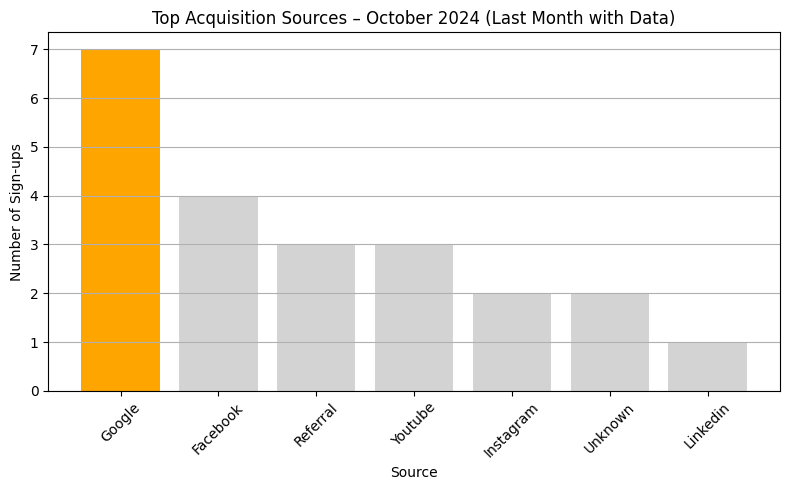


 Top Source: Google with 7 users in October 2024


In [30]:
# Get the latest signup date
latest_date = df['signup_date'].max()
last_month_start = latest_date.replace(day=1)
last_month_end = last_month_start + pd.offsets.MonthEnd(1)

# Filter signups for that last month
last_month_signups = df[
    (df['signup_date'] >= last_month_start) &
    (df['signup_date'] <= last_month_end)
]

# Count sign-ups by source
source_counts = last_month_signups['source'].value_counts().reset_index()
source_counts.columns = ['Source', 'Sign-ups']

# Plot with highlight
if not source_counts.empty:
    top_source = source_counts.iloc[0]

    colors = ['lightgray' if source != top_source['Source'] else 'orange'
              for source in source_counts['Source']]

    plt.figure(figsize=(8, 5))
    plt.bar(source_counts['Source'], source_counts['Sign-ups'], color=colors)
    plt.title(f"Top Acquisition Sources – {last_month_start.strftime('%B %Y')} (Last Month with Data)")
    plt.xlabel("Source")
    plt.ylabel("Number of Sign-ups")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    print(f"\n Top Source: {top_source['Source']} with {top_source['Sign-ups']} users in {last_month_start.strftime('%B %Y')}")
else:
    print("No sign-ups found for the last month with data.")




### 4.2 Which region shows signs of missing or incomplete data? 

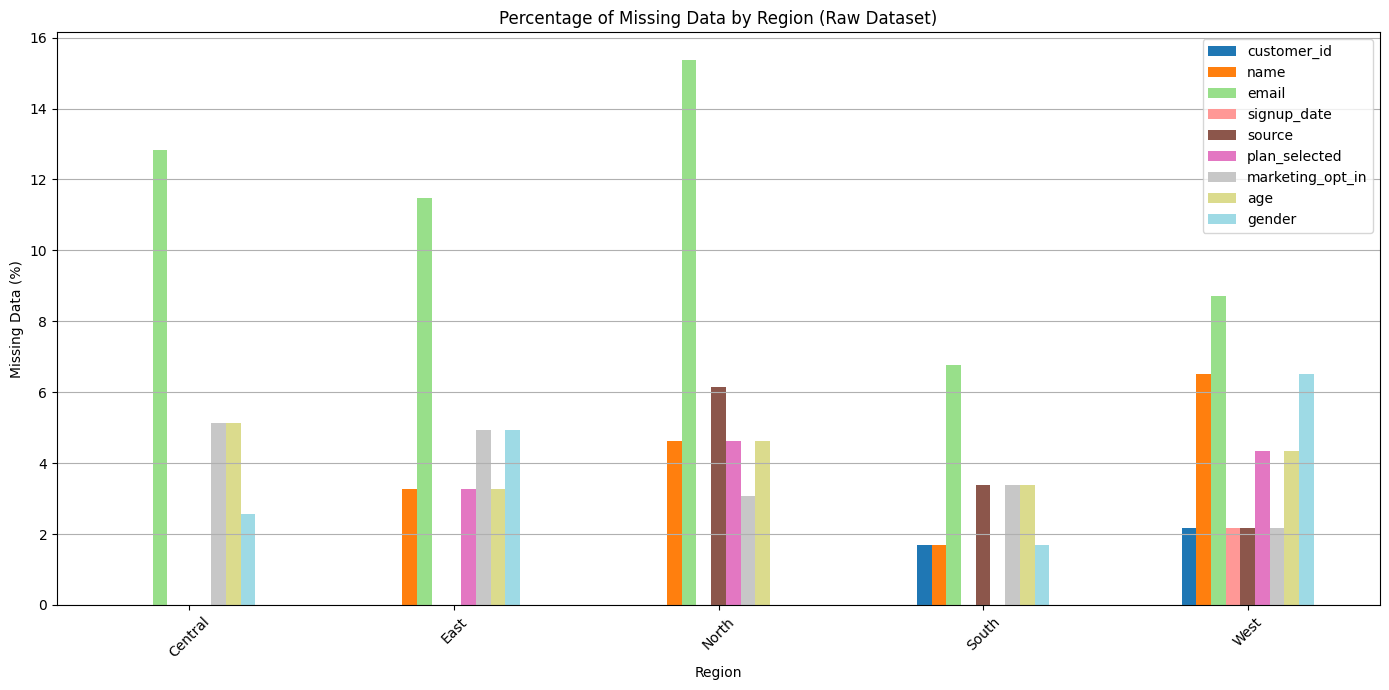

Full summary of missing data percentage by region (raw data):


,customer_id,name,email,signup_date,source,plan_selected,marketing_opt_in,age,gender
region,,,,,,,,,
Central,0.00,0.00,12.82,0.00,0.00,0.00,5.13,5.13,2.56
East,0.00,3.28,11.48,0.00,0.00,3.28,4.92,3.28,4.92
North,0.00,4.62,15.38,0.00,6.15,4.62,3.08,4.62,0.00
South,1.69,1.69,6.78,0.00,3.39,0.00,3.39,3.39,1.69
West,2.17,6.52,8.70,2.17,2.17,4.35,2.17,4.35,6.52


In [31]:
#Load the raw dataset (unprocessed)
df_raw = pd.read_csv('customer_signups_unaltered.csv')  # adjust filename/path as needed

#Filter out invalid or missing region entries
valid_regions_raw = df_raw[
    ~df_raw['region'].isin(['Unknown', 'Unspecified', '', 'None']) & df_raw['region'].notna()
]

# Select columns to analyze (all except 'region')
cols_to_check = [col for col in df_raw.columns if col != 'region']

#Calculate percentage of missing data by region (no filtering)
missing_by_region_raw = valid_regions_raw.groupby('region')[cols_to_check]\
    .apply(lambda x: x.isna().mean() * 100).round(2)

#Plot the missing data percentages
missing_by_region_raw.plot(kind='bar', figsize=(14, 7), colormap='tab20')
plt.title("Percentage of Missing Data by Region (Raw Dataset)")
plt.xlabel("Region")
plt.ylabel("Missing Data (%)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Display full summary table
print("Full summary of missing data percentage by region (raw data):")
display(missing_by_region_raw)






### 4.3 Are older users more or less likely to opt in to marketing? 

Correlation between age and marketing opt-in: 0.001


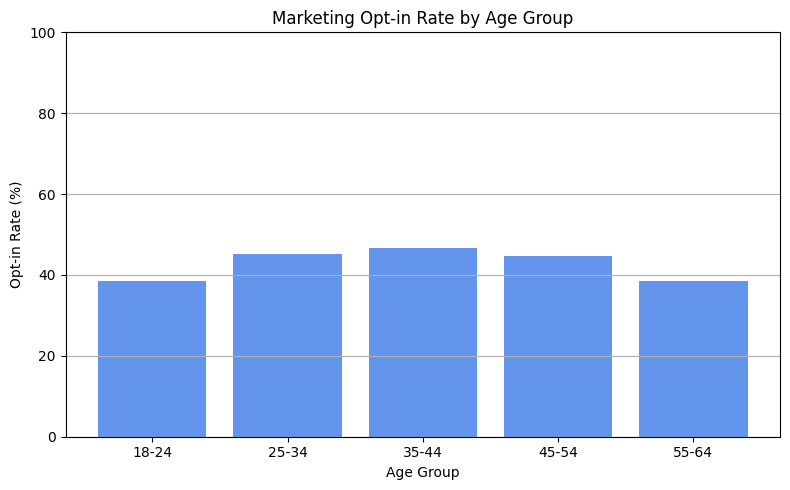

No clear trend between age and marketing opt-in.


In [32]:
# Prepare binary marketing opt-in column
df['marketing_opt_in_bin'] = df['marketing_opt_in'].str.strip().str.lower().map({'yes':1, 'no':0})

# Drop rows with missing age or opt-in info
df_clean = df.dropna(subset=['age', 'marketing_opt_in_bin'])

# Calculate Pearson correlation
corr = df_clean['age'].corr(df_clean['marketing_opt_in_bin'])
print(f"Correlation between age and marketing opt-in: {corr:.3f}")

# Create age bins
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_clean['age_group'] = pd.cut(df_clean['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate opt-in rate per age group
opt_in_rate = df_clean.groupby('age_group', observed=True)['marketing_opt_in_bin'].mean() * 100
opt_in_rate = opt_in_rate.reset_index(name='Opt-in Rate (%)')

# Plot opt-in rate by age group
plt.figure(figsize=(8,5))
plt.bar(opt_in_rate['age_group'].astype(str), opt_in_rate['Opt-in Rate (%)'], color='cornflowerblue')
plt.title('Marketing Opt-in Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Opt-in Rate (%)')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Interpret correlation strength
if corr > 0.1:
    print("Older users are more likely to opt in to marketing.")
elif corr < -0.1:
    print("Older users are less likely to opt in to marketing.")
else:
    print("No clear trend between age and marketing opt-in.")


### 4.4 Which plan is most commonly selected, and by which age group?  

Most commonly selected plan overall: Premium

Most common plan by age group:


,age_group,plan_selected,Count
2,18-24,Pro,10
4,25-34,Basic,46
9,35-44,Premium,20
14,45-54,Pro,16
16,55-64,Basic,4


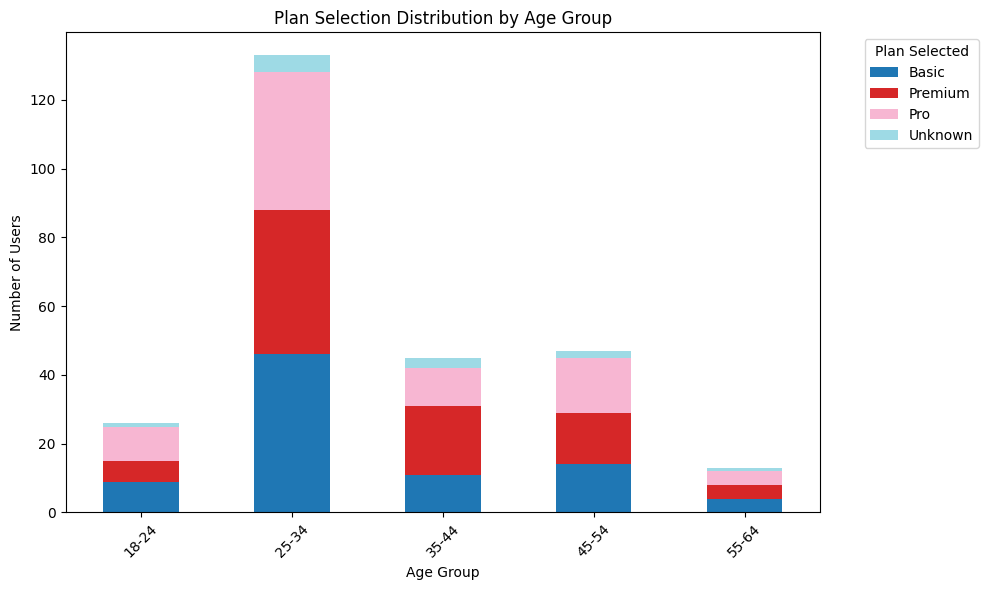

In [33]:
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Add observed=True to groupby to fix warning
plan_age_counts = df.groupby(['age_group', 'plan_selected'], observed=True).size().reset_index(name='Count')

most_common_plan = df['plan_selected'].mode()[0]
print(f"Most commonly selected plan overall: {most_common_plan}")

most_common_by_age = plan_age_counts.loc[plan_age_counts.groupby('age_group', observed=True)['Count'].idxmax()]

print("\nMost common plan by age group:")
display(most_common_by_age)

plan_pivot = plan_age_counts.pivot(index='age_group', columns='plan_selected', values='Count').fillna(0)

plan_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Plan Selection Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='Plan Selected', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
